In [1]:
import pandas as pd

# Loading the dataset to understand its structure and contents
file_path = 'C:\Dataset\diabetes_risk_prediction_dataset.csv'
diabetes_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset for an overview
diabetes_data.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
diabetes_data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

We'll convert the categorical variables to numeric format (binary encoding), 
which will be more suitable for correlation analysis and other statistical tests.

In [5]:
# Converting categorical variables to numeric (binary) format
# Assuming 'Yes' and 'No' are the categories, we'll map them to 1 and 0 respectively

binary_mapping = {'Yes': 1, 'No': 0}

# Applying the mapping to all categorical columns except 'Gender' and 'class'
# 'Gender' and 'class' will be handled separately due to their different categories
categorical_columns = diabetes_data.columns.drop(['Age', 'Gender', 'class'])
diabetes_data_encoded = diabetes_data.copy()

for column in categorical_columns:
    diabetes_data_encoded[column] = diabetes_data_encoded[column].map(binary_mapping)

# Encoding 'Gender' and 'class' separately
gender_mapping = {'Male': 1, 'Female': 0}
class_mapping = {'Positive': 1, 'Negative': 0}

diabetes_data_encoded['Gender'] = diabetes_data_encoded['Gender'].map(gender_mapping)
diabetes_data_encoded['class'] = diabetes_data_encoded['class'].map(class_mapping)

# Checking the encoded data
diabetes_data_encoded.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


The categorical variables in the dataset have been successfully converted to a numeric (binary) format. This conversion makes the dataset more suitable for correlation analysis and other statistical methods.

Next, we will visualize the data distributions for key variables:

Age Distribution: Understanding the age profile of the participants.

Symptom Distribution: Examining the frequency of each symptom in the dataset.

Class Distribution: Observing the distribution of diabetes risk ('class') among participants.

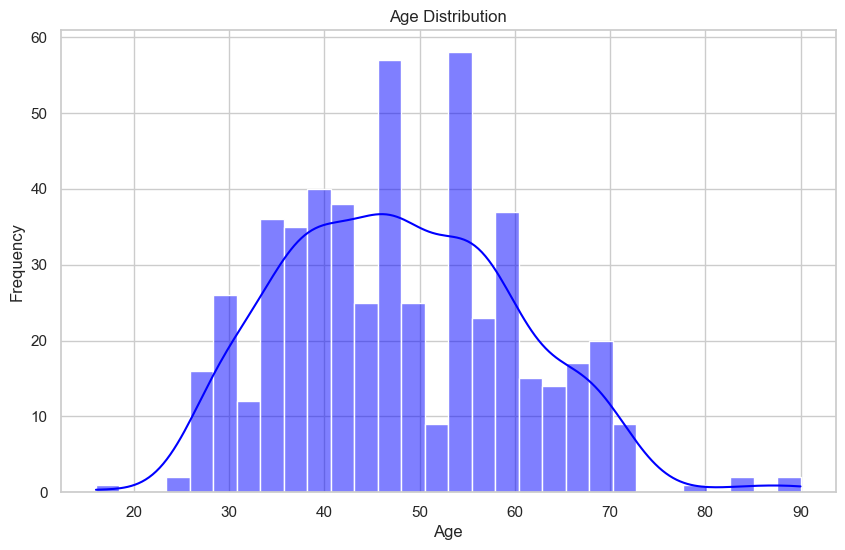

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_data_encoded['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



Age Distribution:

The ages in the dataset range broadly from teenagers to the elderly, with a notable concentration in the 40-60 age range. 
This suggests a diverse set of participants in terms of age.


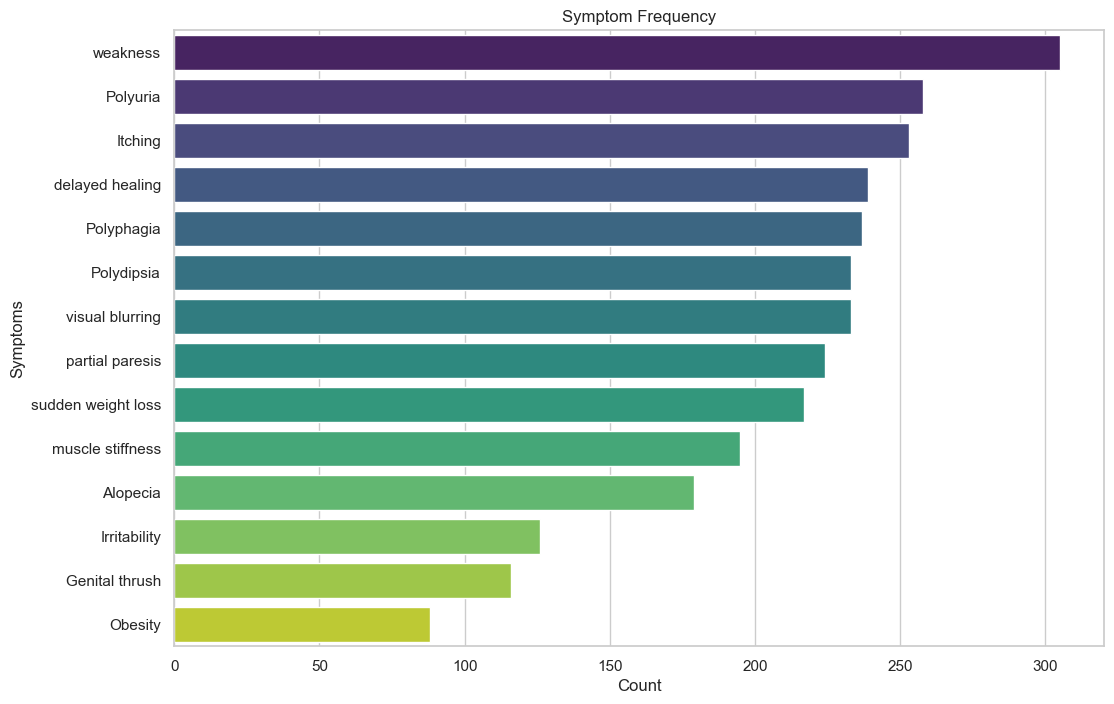

In [12]:

# Symptom Distribution
symptoms = diabetes_data_encoded.columns.drop(['Age', 'Gender', 'class'])
plt.figure(figsize=(12, 8))
sns.barplot(data=diabetes_data_encoded[symptoms].sum().sort_values(ascending=False).reset_index(), 
            x=0, y='index', palette="viridis")
plt.title('Symptom Frequency')
plt.xlabel('Count')
plt.ylabel('Symptoms')
plt.show()


Symptom Frequency:

Certain symptoms like 'Polyuria', 'Polydipsia', and 'sudden weight loss' are more frequent among participants. This could indicate a strong association of these symptoms with diabetes risk.
Conversely, symptoms like 'Obesity' and 'Genital thrush' are less frequent.

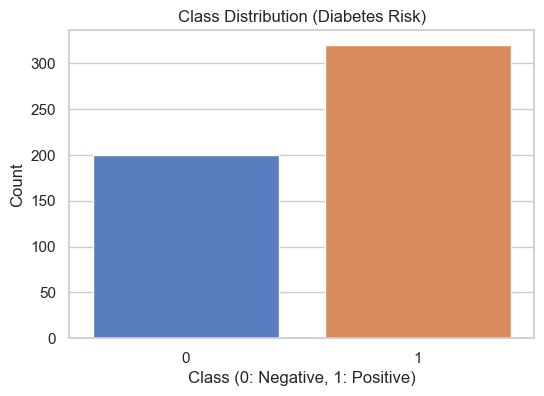

In [8]:
# Class Distribution (Diabetes Risk)
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=diabetes_data_encoded, palette="muted")
plt.title('Class Distribution (Diabetes Risk)')
plt.xlabel('Class (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()


Class Distribution (Diabetes Risk):

The number of participants with a positive diabetes risk ('1') is higher than those with a negative risk ('0'). 
This indicates a prevalence of higher diabetes risk in this particular dataset.

Next, we will conduct a correlation analysis to explore how different factors, including symptoms and demographic details, correlate with the diabetes risk ('class'). This will help us understand which factors are most strongly associated with the risk of diabetes. 

Let's proceed with that analysis.

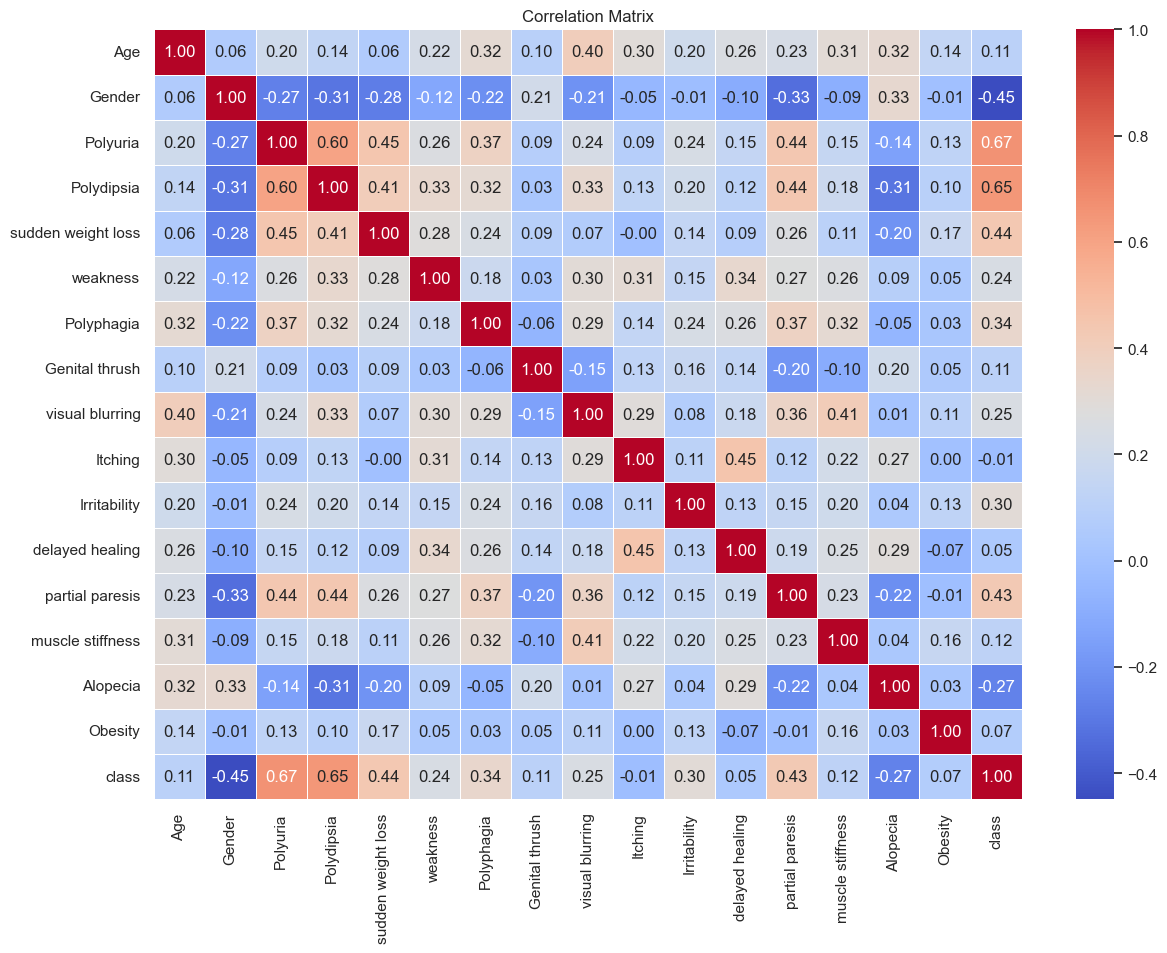

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233
Name: class, dtype: float64

In [15]:
# Correlation analysis
correlation_matrix = diabetes_data_encoded.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Focusing on the correlation with the class (diabetes risk)
correlation_with_class = correlation_matrix['class'].sort_values(ascending=False)
correlation_with_class


The correlation analysis reveals several interesting insights:

Strong Positive Correlations:

Polyuria (0.67) and Polydipsia (0.65) show the strongest positive correlations with diabetes risk. This indicates that these symptoms are significantly associated with the risk of diabetes.
Other symptoms like sudden weight loss, partial paresis, and Polyphagia also have notable positive correlations, suggesting their relevance in diabetes risk assessment.

Negative Correlations:

Alopecia (-0.27) and Gender (-0.45) are negatively correlated with diabetes risk. The negative correlation with gender suggests that females in this dataset might have a lower risk of diabetes compared to males.
Itching has a very weak negative correlation, indicating it might not be a significant factor in diabetes risk.

Other Observations:

Age shows a relatively low but positive correlation (0.11) with diabetes risk.
Obesity, often considered a risk factor in diabetes, shows a surprisingly low positive correlation (0.07) in this dataset.
These correlations can be valuable for healthcare professionals and policymakers in understanding and predicting diabetes risk. 

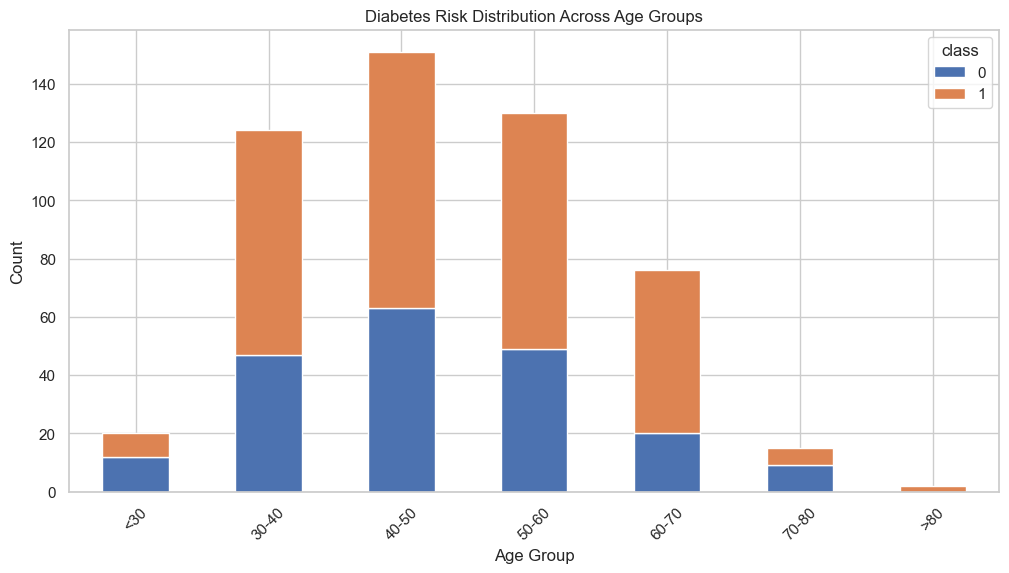

class,0,1
Age Group,,
<30,12,8
30-40,47,77
40-50,63,88
50-60,49,81
60-70,20,56
70-80,9,6
>80,0,2


In [16]:
# Analyzing Age and Diabetes Risk

# Creating age groups for analysis
bins = [0, 30, 40, 50, 60, 70, 80, 90]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '>80']
diabetes_data_encoded['Age Group'] = pd.cut(diabetes_data_encoded['Age'], bins=bins, labels=labels, right=False)

# Grouping by age group and class to find the count in each category
age_group_risk = diabetes_data_encoded.groupby(['Age Group', 'class']).size().unstack().fillna(0)

# Plotting the distribution of diabetes risk across age groups
age_group_risk.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Diabetes Risk Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

age_group_risk


Age and Diabetes Risk Analysis

The bar chart and the accompanying data provide insights into how the risk of diabetes varies across different age groups:

Younger Age Groups (<30): The prevalence of diabetes risk is relatively low in this age group, with slightly fewer cases of diabetes risk compared to no risk.

Middle Age Groups (30-60): There's a noticeable increase in diabetes risk in the 30-60 age range. Particularly, the groups 40-50 and 50-60 show a higher number of individuals at diabetes risk compared to those not at risk.

Senior Age Groups (60-70): The 60-70 age group has a significant number of individuals at risk, indicating a high prevalence of diabetes risk in this age bracket.

Older Age Groups (70+): The number of cases decreases in the 70+ age range, possibly due to a smaller sample size in these age brackets.

This analysis suggests that the risk of diabetes increases with age, particularly from the 30s to the 60s, and then shows a decrease in the older age groups, likely influenced by the sample size.

Next, we'll look at gender-specific trends to see if there's a significant difference in diabetes risk between males and females.

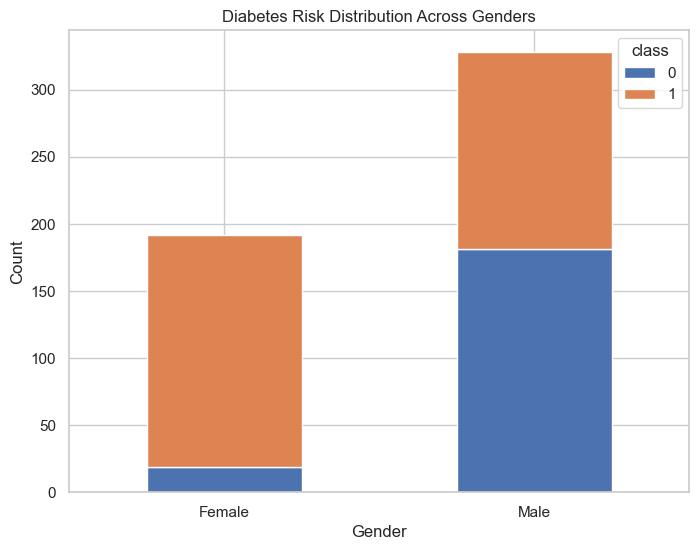

(class     0    1
 Female   19  173
 Male    181  147,
 class          0         1
 Female  0.098958  0.901042
 Male    0.551829  0.448171)

In [17]:
# Analyzing Gender-Specific Trends

# Grouping by gender and class to find the count in each category
gender_risk = diabetes_data_encoded.groupby(['Gender', 'class']).size().unstack().fillna(0)

# Renaming the indices for better understanding
gender_risk.index = ['Female', 'Male']

# Plotting the distribution of diabetes risk across genders
gender_risk.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Diabetes Risk Distribution Across Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

gender_risk, gender_risk.div(gender_risk.sum(axis=1), axis=0) # Showing both count and proportion


Gender-Specific Trends Analysis

The bar chart and the data tables provide insights into the diabetes risk distribution across genders:

Females: Among the female participants, a significant majority (about 90%) are classified as at risk for diabetes. 
This indicates a high prevalence of diabetes risk in the female group within this dataset.

Males: The situation is quite different for males. About 55% of male participants are not at risk, while around 45% are at risk. 
This suggests a lower prevalence of diabetes risk among males compared to females in this dataset.

Next, we will examine which symptoms are most strongly associated with a higher risk of diabetes, based on our correlation analysis. 

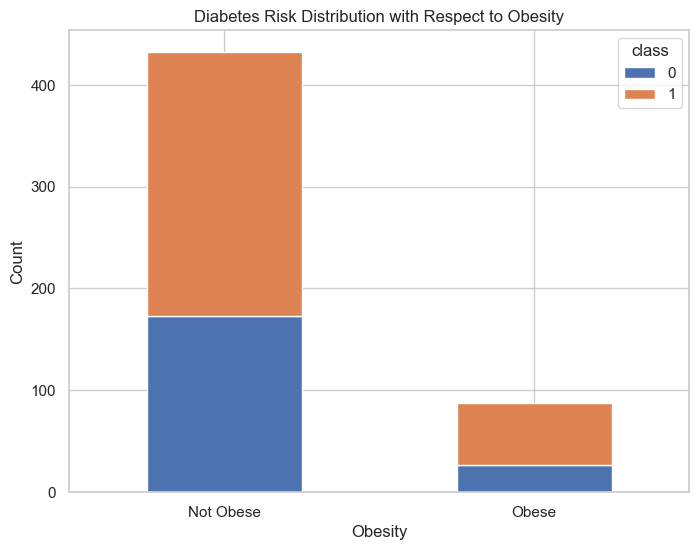

(class        0    1
 Not Obese  173  259
 Obese       27   61,
 class             0         1
 Not Obese  0.400463  0.599537
 Obese      0.306818  0.693182)

In [18]:
# Analyzing the relationship between Obesity and Diabetes Risk

# Grouping by obesity and class to find the count in each category
obesity_risk = diabetes_data_encoded.groupby(['Obesity', 'class']).size().unstack().fillna(0)

# Renaming the indices for better understanding
obesity_risk.index = ['Not Obese', 'Obese']

# Plotting the distribution of diabetes risk with respect to obesity
obesity_risk.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Diabetes Risk Distribution with Respect to Obesity')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

obesity_risk, obesity_risk.div(obesity_risk.sum(axis=1), axis=0) # Showing both count and proportion


Lifestyle Factors Analysis: Obesity and Diabetes Risk
    
The analysis of obesity in relation to diabetes risk reveals:

Not Obese Individuals: Among those who are not classified as obese, about 60% are at risk of diabetes, while 40% are not.

Obese Individuals: In the obese group, around 69% are at risk of diabetes, and about 31% are not.
    
This analysis shows that while there is a higher proportion of diabetes risk among obese individuals compared to non-obese individuals, the difference is not as pronounced as might be expected. 

This observation aligns with the earlier noted low correlation between obesity and diabetes risk in this dataset. It suggests that while obesity is a factor, it may not be as strong a predictor of diabetes risk as some of the other symptoms like Polyuria and Polydipsia in this particular dataset.

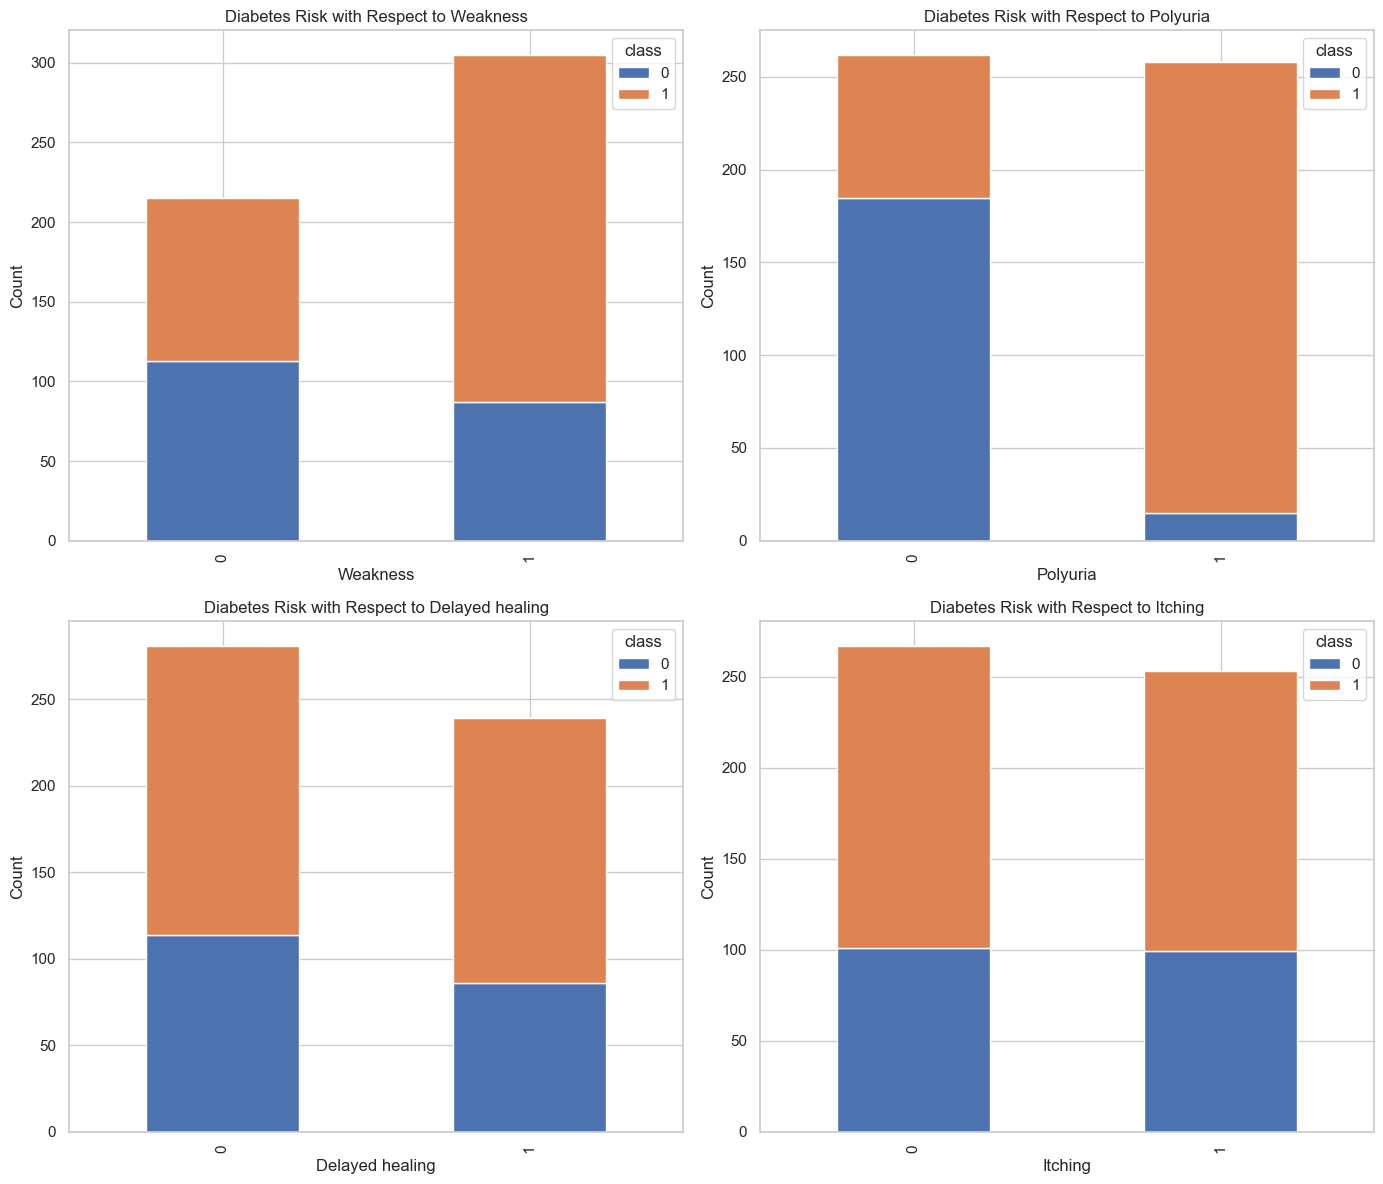

class                                         0     1
weakness Polyuria delayed healing Itching            
0        0        0               0        83.0  20.0
                                  1        11.0  10.0
                  1               0         3.0   4.0
                                  1         8.0   3.0
         1        0               0         0.0  24.0
                                  1         0.0  11.0
                  1               0         0.0  16.0
                                  1         8.0  14.0
1        0        0               0        12.0  11.0
                                  1         8.0   6.0

In [19]:
# Analyzing the impact of specific conditions: Weakness, Polyuria, Delayed Healing, and Itching on Diabetes Risk

# Grouping by each condition and class to find the count in each category
conditions = ['weakness', 'Polyuria', 'delayed healing', 'Itching']
condition_risk = diabetes_data_encoded.groupby(conditions)['class'].value_counts().unstack().fillna(0)

# Plotting the distribution of diabetes risk with respect to each condition
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, condition in enumerate(conditions):
    ax = axes[i//2, i%2]
    diabetes_data_encoded.groupby(condition)['class'].value_counts().unstack().plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Diabetes Risk with Respect to {condition.capitalize()}')
    ax.set_xlabel(condition.capitalize())
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

condition_risk.head(10)  # Displaying a subset of the results for readability


Weakness:

The presence or absence of weakness shows a varied impact on diabetes risk, with instances of both high and low diabetes risk across different categories.

Polyuria:

Polyuria appears to have a significant impact on diabetes risk. The bar charts show a notable increase in diabetes risk when Polyuria is present.

Delayed Healing:

Delayed healing also seems to influence diabetes risk, though the effect is less pronounced than Polyuria. There are cases of diabetes risk in both the presence and absence of delayed healing.

Itching:

The impact of itching on diabetes risk is less clear. There are instances of diabetes risk in both the presence and absence of itching, indicating that it might not be as strong a predictor of diabetes risk as some other symptoms.

Given the nature of the data (a classification problem with binary outcomes), a logistic regression model can be a good starting point due to its simplicity and interpretability. Other models such as Random Forest or Gradient Boosting could also be used for potentially higher accuracy, but they are more complex and less interpretable.

For this predictive modeling:

Prepare the Data: We'll split the data into features (X) and the target variable (y), which is the 'class' column indicating diabetes risk.

Split into Training and Testing Sets: This helps in evaluating the performance of the model on unseen data.

Model Training: We'll use logistic regression as the initial model.

Model Evaluation: We'll assess the model's performance using appropriate metrics like accuracy, precision, recall, and the ROC-AUC score.

Let's start by preparing the data and splitting it into training and testing sets.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Preparing the data
X = diabetes_data_encoded.drop(['class', 'Age Group'], axis=1)  # Features
y = diabetes_data_encoded['class']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training using Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, roc_auc, conf_matrix


(0.9230769230769231,
 0.9315068493150684,
 0.9577464788732394,
 0.9031156636790441,
 array([[28,  5],
        [ 3, 68]], dtype=int64))

Predictive Modeling Results

The logistic regression model for predicting diabetes risk shows the following performance metrics:

Accuracy: Approximately 92.3%. This indicates a high overall rate of correct predictions.

Precision: About 93.2%. This reflects the proportion of positive identifications that were actually correct.

Recall (Sensitivity): Around 95.8%. This indicates the proportion of actual positives that were identified correctly.

ROC-AUC Score: Approximately 90.3%. This score represents the model's ability to distinguish between the classes.

The confusion matrix provides additional insight:

True Negatives: 28 (predicted negative and actually negative)

False Positives: 5 (predicted positive but actually negative)

False Negatives: 3 (predicted negative but actually positive)

True Positives: 68 (predicted positive and actually positive)
    
Overall, the logistic regression model performs quite well on this dataset, with high accuracy, precision, and recall. The ROC-AUC score also suggests good discriminatory ability of the model.

In [23]:
# Extracting the coefficients from the logistic regression model
coefficients = pd.DataFrame(log_reg.coef_[0], index=X.columns, columns=['Coefficient'])

# Sorting the coefficients to find the most influential factors
sorted_coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

sorted_coefficients


,Coefficient
Polydipsia,2.639285
Polyuria,2.578411
Irritability,1.469758
Genital thrush,1.335885
partial paresis,1.017672
sudden weight loss,0.902618
visual blurring,0.770234
weakness,0.528701
Polyphagia,0.451716
Age,-0.036817


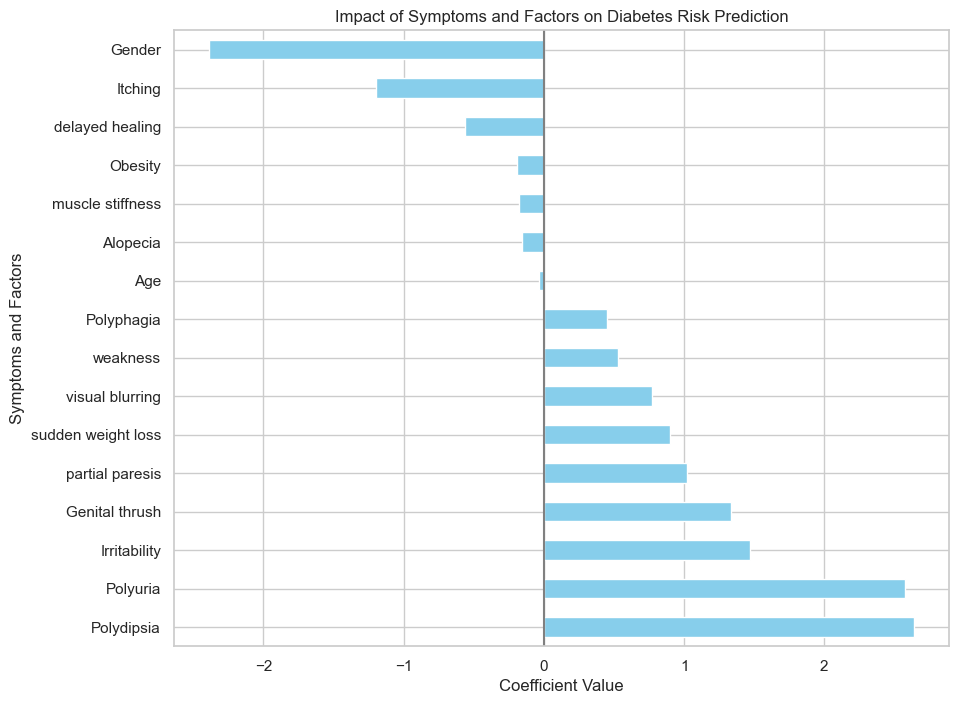

In [24]:
# Visualizing the coefficients as a horizontal bar chart

plt.figure(figsize=(10, 8))
sorted_coefficients['Coefficient'].plot(kind='barh', color='skyblue')
plt.title('Impact of Symptoms and Factors on Diabetes Risk Prediction')
plt.xlabel('Coefficient Value')
plt.ylabel('Symptoms and Factors')
plt.axvline(x=0, color='grey', lw=1.5)
plt.show()


The horizontal bar chart visualizes the impact of various symptoms and factors on diabetes risk prediction, based on the coefficients from the logistic regression model:

Symptoms and factors above the horizontal line (positive coefficients) are associated with an increased risk of diabetes. The further right the bar extends, the stronger the association. For instance, Polydipsia and Polyuria have the most extended bars to the right, indicating their strong positive impact on diabetes risk prediction.

Symptoms and factors below the line (negative coefficients) are associated with a decreased risk of diabetes. The further left the bar extends, the stronger the association. Notably, Gender (being male) and Itching show significant negative impacts.

This visualization effectively communicates which symptoms and demographic factors are most influential in predicting diabetes risk according to the model, providing valuable insights for healthcare professionals and policymakers in managing and preventing diabetes.